In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gcmc_uplimit = 10
gb_uplimit = 7
expected_Mu = -804
delta_mu = 0.27 # in kJ/mol

In [3]:
G_gcmc_means = np.loadtxt('gcmc_G.txt')
G_gcmc_stderr = np.loadtxt('gcmc_G_err.txt')
G_gb_means_0 = np.loadtxt('gb_G_npt2_0.txt')
G_gb_means_0_27 = np.loadtxt('gb_G_npt2_0.27.txt')
G_gb_stderr = np.loadtxt('gb_G_err_npt2_0.txt')

In [4]:
G_diff_0 = []
G_diff_0_19 = []
for i in range(0, gb_uplimit):
    G_diff_0.append(G_gb_means_0[i] - G_gcmc_means[i])
    G_diff_0_19.append(G_gb_means_0_27[i] - G_gcmc_means[i])

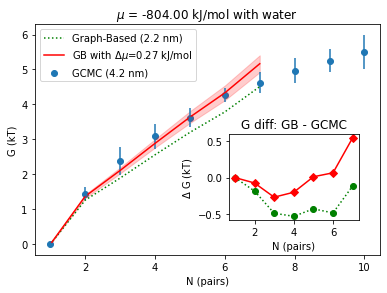

In [5]:
fig = plt.figure()
left, bottom, width, height = 0.1, 0.11, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])

ax1.scatter(list(range(1, gcmc_uplimit+1)), np.array(G_gcmc_means), label='GCMC (4.2 nm)')
ax1.errorbar(list(range(1, gcmc_uplimit+1)), np.array(G_gcmc_means), yerr = G_gcmc_stderr, fmt='.')

ax1.plot(list(range(1, gb_uplimit+1)), G_gb_means_0, color='g', linestyle='dotted', label='Graph-Based (2.2 nm)')

ax1.plot(list(range(1, gb_uplimit+1)), G_gb_means_0_27, color='r', label=r'GB with $\Delta \mu$=%s kJ/mol'%delta_mu)
ax1.fill_between(list(range(1, gb_uplimit+1)), G_gb_means_0_27-G_gb_stderr, G_gb_means_0_27+G_gb_stderr, color='r', alpha=0.2)

ax1.set_xlabel('N (pairs)')
ax1.set_ylabel('G (kT)')
ax1.set_title(r"$\mu$ = %.2f kJ/mol with water"%expected_Mu)
#plt.fill_between(list(range(LowerLimit, UpperLimit+1)), np.array(G_means)-np.array(G_stderr), np.array(G_means)+np.array(G_stderr), color='r', alpha=0.2)
ax1.legend()

left, bottom, width, height = 0.55, 0.23, 0.3, 0.3
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(list(range(1, gb_uplimit+1)), np.array(G_diff_0), color='g', marker='o', linestyle='dotted', label='Original GB')
ax2.plot(list(range(1, gb_uplimit+1)), np.array(G_diff_0_19), color='r', marker='D',label=r'GB with $\Delta \mu$')
ax2.set_xlabel('N (pairs)')
ax2.set_ylabel(r'$\Delta$ G (kT)')
ax2.set_title('G diff: GB - GCMC')

plt.savefig('NUCL_Q1_W_npt_diff.pdf')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
gcmc_uplimit = 10
gb_uplimit = 7
expected_Mu = -804

In [8]:
G_gcmc_means = np.loadtxt('gcmc_G.txt')
G_gcmc_stderr = np.loadtxt('gcmc_G_err.txt')
G_gb_means_4nm = np.loadtxt('gb_G_4nm.txt')
G_gb_stderr = np.loadtxt('gb_G_err_4nm.txt')

In [9]:
G_diff_4nm = []
for i in range(0, gb_uplimit):
    G_diff_4nm.append(G_gb_means_4nm[i] - G_gcmc_means[i])

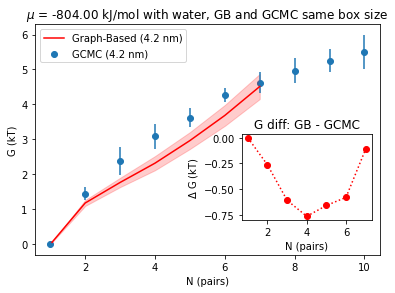

In [10]:
fig = plt.figure()
left, bottom, width, height = 0.1, 0.11, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])

ax1.scatter(list(range(1, gcmc_uplimit+1)), np.array(G_gcmc_means), label='GCMC (4.2 nm)')
ax1.errorbar(list(range(1, gcmc_uplimit+1)), np.array(G_gcmc_means), yerr = G_gcmc_stderr, fmt='.')

ax1.plot(list(range(1, gb_uplimit+1)), G_gb_means_4nm, color='r', label='Graph-Based (4.2 nm)')
ax1.fill_between(list(range(1, gb_uplimit+1)), G_gb_means_4nm-G_gb_stderr, G_gb_means_4nm+G_gb_stderr, color='r', alpha=0.2)

ax1.set_xlabel('N (pairs)')
ax1.set_ylabel('G (kT)')
ax1.set_title(r"$\mu$ = %.2f kJ/mol with water, GB and GCMC same box size"%expected_Mu)
#plt.fill_between(list(range(LowerLimit, UpperLimit+1)), np.array(G_means)-np.array(G_stderr), np.array(G_means)+np.array(G_stderr), color='r', alpha=0.2)
ax1.legend()

left, bottom, width, height = 0.58, 0.23, 0.3, 0.3
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(list(range(1, gb_uplimit+1)), np.array(G_diff_4nm), color='r', marker='o', linestyle='dotted', label='GB 4nm')
ax2.set_xlabel('N (pairs)')
ax2.set_ylabel(r'$\Delta$ G (kT)')
ax2.set_title('G diff: GB - GCMC')

plt.savefig('NUCL_Q1_W_4nm_diff.pdf')